In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
# Read the CSV file
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv')

Slide 6-7 (Programming Languages Trends): 
- Insert a bar chart summarizing the top 10 programming languages for the current year. 
- Insert a bar or other relevant visualization summarizing the anticipated programming language trends for the next year.
- Include findings and implications about the programming language trends

In [18]:
# Bar chart summarizing the top 10 programming languages for the current year
df['LanguageHaveWorkedWith'].unique()

array([nan,
       'Bash/Shell (all shells);Go;HTML/CSS;Java;JavaScript;Python;TypeScript',
       'C#', ...,
       'Bash/Shell (all shells);C;C#;C++;Delphi;Groovy;HTML/CSS;Java;JavaScript;Objective-C;PowerShell;Python;SQL;Swift;TypeScript',
       'C;C++;Go;Lua;Objective-C;Python;Rust;SQL',
       'C;HTML/CSS;Java;JavaScript;PHP;Python;TypeScript'], dtype=object)

In [21]:
df['LanguageHaveWorkedWith'].isnull().sum()

5692

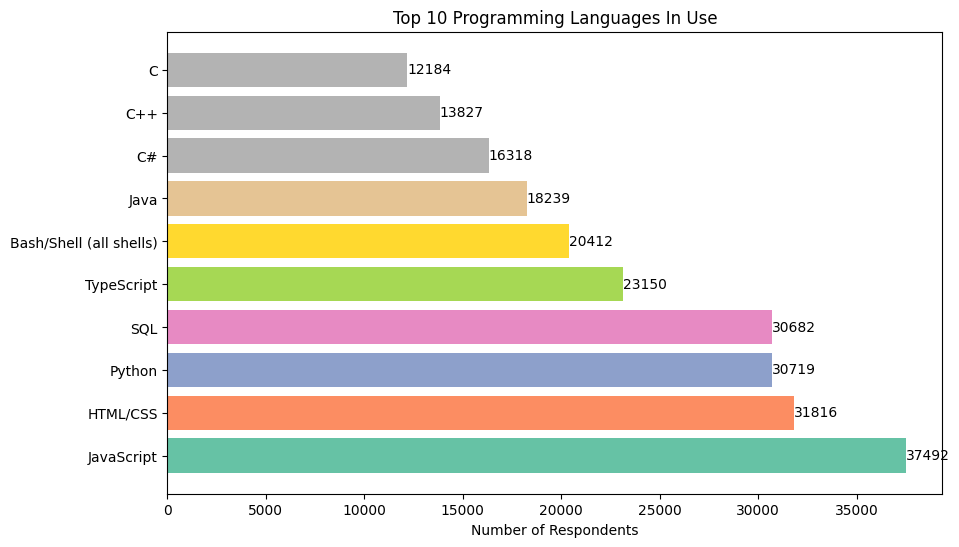

In [125]:
# transfrom LanguageHaveWorkedWith data
# Drop NaNs and split the language strings
lang_series = df['LanguageHaveWorkedWith'].dropna().str.split(';')

# Flatten the list and strip spaces
all_languages = pd.Series([lang.strip() for sublist in lang_series for lang in sublist])

# Count language frequency and get top 10
top_langs = all_languages.value_counts().head(10)

# Plot bar chart (horizontal)
colors = plt.cm.Set2(range(len(df)))
plt.figure(figsize=(10, 6))

bars = plt.barh(top_langs.index, top_langs.values, color=colors)

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 2, bar.get_y() + bar.get_height()/2,
             str(width), va='center')

plt.title('Top 10 Programming Languages In Use')
plt.xlabel('Number of Respondents')
plt.show()

In [59]:
df['DatabaseHaveWorkedWith'].unique()

array([nan, 'Dynamodb;MongoDB;PostgreSQL', 'Firebase Realtime Database',
       ..., 'MySQL;Presto;Redis;TiDB',
       'Dynamodb;Elasticsearch;IBM DB2;MariaDB;MySQL;PostgreSQL',
       'Couch DB;H2;Microsoft SQL Server;MySQL;Oracle;PostgreSQL;SQLite'],
      dtype=object)

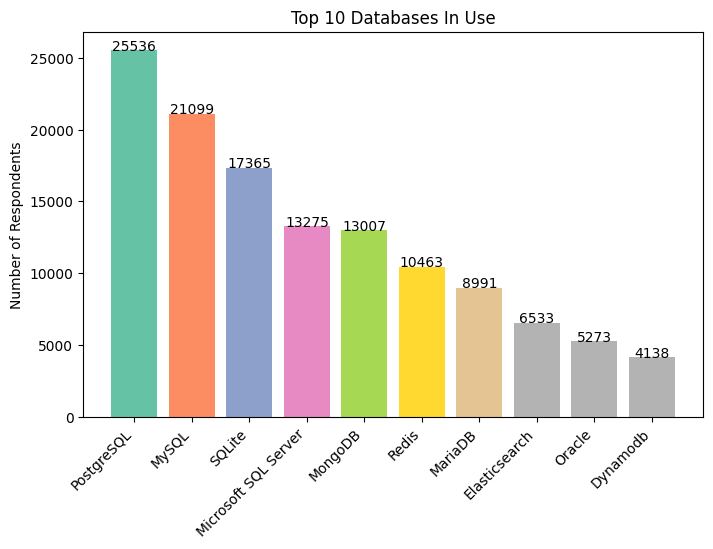

In [127]:
# transfrom DatabaseHaveWorkedWith data
# Drop NaNs and split the language strings
db_series = df['DatabaseHaveWorkedWith'].dropna().str.split(';')

# Flatten the list and strip spaces
all_dbs = pd.Series([db.strip() for sublist in db_series for db in sublist])

# Count db frequency and get top 10
top_dbs = all_dbs.value_counts().head(10)

# Plot vertical column chart
plt.figure(figsize=(8, 5))
colors = plt.cm.Set2(range(len(df)))
bars = plt.bar(top_dbs.index, top_dbs.values, color=colors)

# Add labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 2,
             str(height), ha='center')

plt.title('Top 10 Databases In Use')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.show()

In [97]:
df['PlatformHaveWorkedWith'].unique()

array([nan, 'Amazon Web Services (AWS);Heroku;Netlify', 'Google Cloud',
       ...,
       'Amazon Web Services (AWS);Cloudflare;Digital Ocean;Google Cloud;Microsoft Azure;Netlify;PythonAnywhere;Render',
       'Alibaba Cloud;Amazon Web Services (AWS);Colocation;Databricks;Firebase;Fly.io;Google Cloud;Heroku;Managed Hosting;Microsoft Azure;Netlify;OpenStack;PythonAnywhere;Vercel;VMware',
       'Amazon Web Services (AWS);Cloudflare;Firebase;Linode, now Akamai;Vercel'],
      dtype=object)

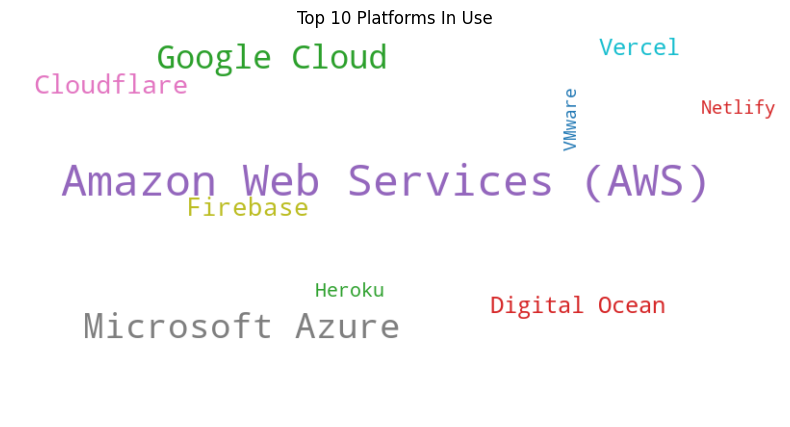

In [105]:
# transfrom PlatformHaveWorkedWith data
# Drop NaNs and split the language strings
platform_series = df['PlatformHaveWorkedWith'].dropna().str.split(';')

# Flatten the list and strip spaces
all_platform = pd.Series([lang.strip() for sublist in platform_series for lang in sublist])

# Count platform frequency, get top 10
top_platform = all_platform.value_counts().head(10)
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      colormap='tab10').generate_from_frequencies(top_platform)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 10 Platforms In Use')
plt.show()

In [167]:
df['WebframeHaveWorkedWith'].unique()

array([nan, 'Express;Next.js;Node.js;React', 'ASP.NET CORE', ...,
       'Angular;jQuery;Laravel;React;Ruby on Rails;WordPress',
       'Django;Express;Laravel;Next.js;Node.js;Svelte;WordPress',
       'Angular;AngularJS;ASP.NET;ASP.NET CORE;Drupal;jQuery;Next.js;Node.js;React;Spring Boot'],
      dtype=object)

In [169]:
# transfrom WebframeHaveWorkedWith data
# Drop NaNs and split the language strings
webframe_series = df['WebframeHaveWorkedWith'].dropna().str.split(';')

# Flatten the list and strip spaces
all_webframe = pd.Series([lang.strip() for sublist in webframe_series for lang in sublist])

# Count platform frequency
top_webframe = all_webframe.value_counts().head(10)

In [173]:
top_webframe.head(10)

Node.js         19772
React           19167
jQuery          10381
Next.js          8681
Express          8614
Angular          8306
ASP.NET CORE     8187
Vue.js           7483
ASP.NET          6265
Flask            6245
Name: count, dtype: int64

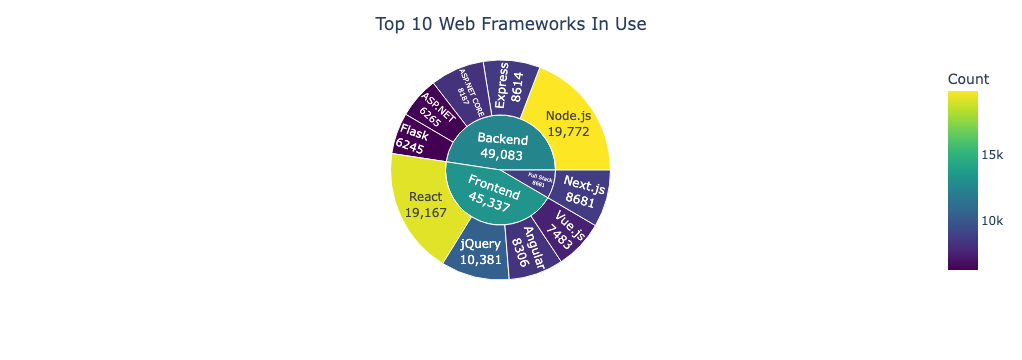

In [179]:
import pandas as pd
import plotly.express as px

# Your dataset as a Series
top_webframe = pd.Series({
    'Node.js': 19772,
    'React': 19167,
    'jQuery': 10381,
    'Next.js': 8681,
    'Express': 8614,
    'Angular': 8306,
    'ASP.NET CORE': 8187,
    'Vue.js': 7483,
    'ASP.NET': 6265,
    'Flask': 6245
}, name='count')

# Convert to DataFrame and assign categories
df_webframe = top_webframe.reset_index()
df_webframe.columns = ['Framework', 'Count']

# Assign framework category manually
df_webframe['Category'] = df_webframe['Framework'].map({
    'Node.js': 'Backend',
    'React': 'Frontend',
    'jQuery': 'Frontend',
    'Next.js': 'Full Stack',
    'Express': 'Backend',
    'Angular': 'Frontend',
    'ASP.NET CORE': 'Backend',
    'Vue.js': 'Frontend',
    'ASP.NET': 'Backend',
    'Flask': 'Backend'
})

# Create hierarchy bubble chart (sunburst)
fig = px.sunburst(
    df_webframe,
    path=['Category', 'Framework'],  # Hierarchy: Category → Framework
    values='Count',                  # Bubble size
    color='Count',                   # Bubble color intensity
    color_continuous_scale='Viridis'   # Choose a color scale
)

# Customize layout
fig.update_layout(
    title={
        'text': 'Top 10 Web Frameworks In Use',
        'x': 0.5,
        'xanchor': 'center'
    }
)

fig.update_traces(textinfo='label+value')  # Show both name and count

fig.show()

In [129]:
# Insert a bar or other relevant visualization summarizing the anticipated programming language trends for the next year
df['LanguageWantToWorkWith'].unique()

array([nan,
       'Bash/Shell (all shells);Go;HTML/CSS;Java;JavaScript;Kotlin;Python;TypeScript',
       'C#', ...,
       'Bash/Shell (all shells);C;C++;Elixir;Erlang;Go;HTML/CSS;Java;JavaScript;Kotlin;Lua;PowerShell;Python;Rust;Solidity;SQL;TypeScript;VBA;Visual Basic (.Net);Zig',
       'Bash/Shell (all shells);C;C++;Python;Ruby;SQL',
       'Bash/Shell (all shells);C#;Go;HTML/CSS;Java;JavaScript;Kotlin;Objective-C;Python;Rust;SQL;Swift;TypeScript'],
      dtype=object)

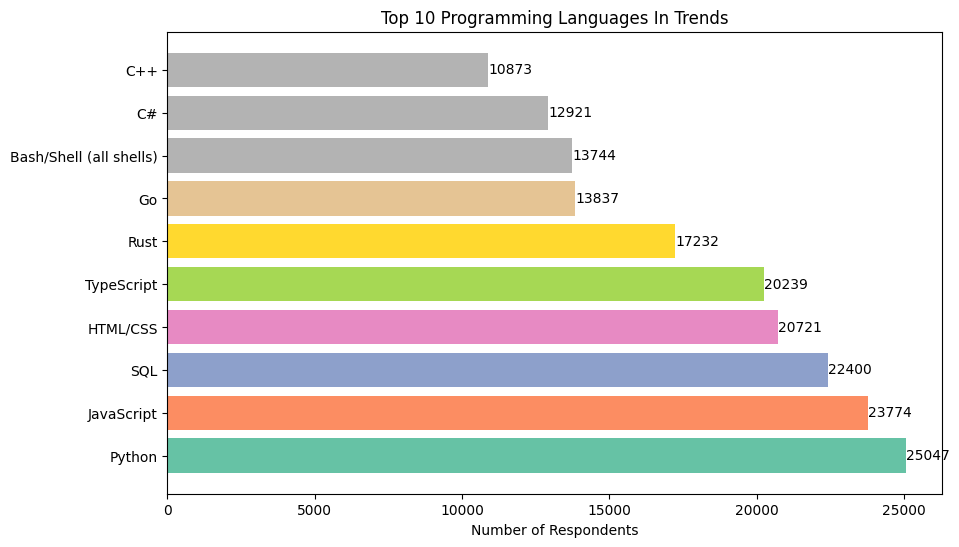

In [131]:
# transfrom LanguageWantToWorkWith data
# Drop NaNs and split the language strings
lang_series = df['LanguageWantToWorkWith'].dropna().str.split(';')

# Flatten the list and strip spaces
all_langs = pd.Series([db.strip() for sublist in lang_series for db in sublist])

# Count lang frequency and get top 10
top_langs = all_langs.value_counts().head(10)

# Plot bar chart (horizontal)
colors = plt.cm.Set2(range(len(df)))
plt.figure(figsize=(10, 6))

bars = plt.barh(top_langs.index, top_langs.values, color=colors)

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 2, bar.get_y() + bar.get_height()/2,
             str(width), va='center')

plt.title('Top 10 Programming Languages In Trends')
plt.xlabel('Number of Respondents')
plt.show()

In [133]:
df['DatabaseWantToWorkWith'].unique()

array([nan, 'PostgreSQL', 'Firebase Realtime Database', ...,
       'Cassandra;Firebase Realtime Database;MariaDB;Microsoft Access;MongoDB;MySQL;PostgreSQL;Redis',
       'MySQL;Presto;TiDB',
       'BigQuery;Cassandra;Databricks SQL;DuckDB;Elasticsearch;Firebase Realtime Database;Microsoft SQL Server;MongoDB;MySQL;PostgreSQL;Redis;Snowflake;SQLite;Supabase'],
      dtype=object)

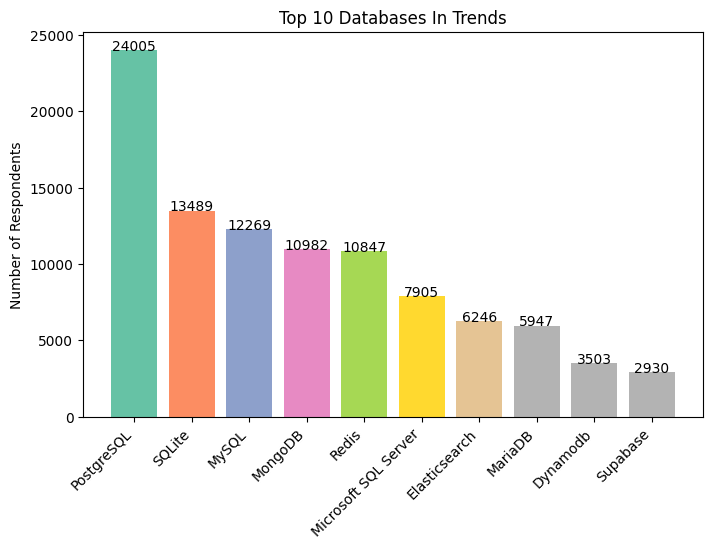

In [135]:
# transfrom DatabaseWantToWorkWith data
# Drop NaNs and split the language strings
db_series = df['DatabaseWantToWorkWith'].dropna().str.split(';')

# Flatten the list and strip spaces
all_dbs = pd.Series([db.strip() for sublist in db_series for db in sublist])

# Count db frequency and get top 10
top_dbs = all_dbs.value_counts().head(10)

# Plot vertical column chart
plt.figure(figsize=(8, 5))
colors = plt.cm.Set2(range(len(df)))
bars = plt.bar(top_dbs.index, top_dbs.values, color=colors)

# Add labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 2,
             str(height), ha='center')

plt.title('Top 10 Databases In Trends')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.show()

In [137]:
df['PlatformWantToWorkWith'].unique()

array([nan, 'Amazon Web Services (AWS);Heroku;Netlify', 'Google Cloud',
       ...,
       'Amazon Web Services (AWS);Cloudflare;Firebase;Google Cloud;Heroku;Microsoft Azure;OVH;Vercel',
       'Amazon Web Services (AWS);Google Cloud;Heroku;Linode, now Akamai;Vercel',
       'PythonAnywhere;Render;Vercel'], dtype=object)

In [139]:
# transfrom PlatformWantToWorkWith data
# Drop NaNs and split the language strings
platform_series = df['PlatformWantToWorkWith'].dropna().str.split(';')

# Flatten the list and strip spaces
all_platform = pd.Series([db.strip() for sublist in platform_series for db in sublist])

# Count db frequency
top_platform = all_platform.value_counts().head(10)

In [141]:
top_platform.head(10)

Amazon Web Services (AWS)    18040
Microsoft Azure              10304
Google Cloud                  9772
Cloudflare                    6881
Firebase                      4952
Vercel                        4614
Digital Ocean                 4507
Hetzner                       2460
Supabase                      2287
Netlify                       2217
Name: count, dtype: int64

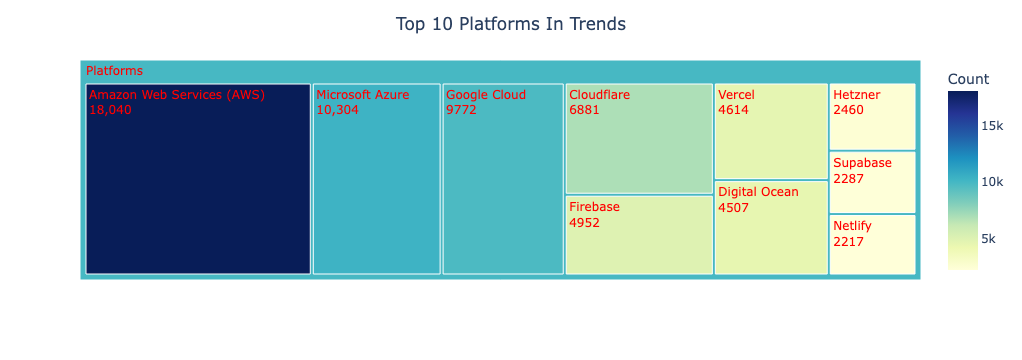

In [151]:
import plotly.express as px

# Simulated top_platform Series
top_platform = pd.Series({
    'Amazon Web Services (AWS)': 18040,
    'Microsoft Azure': 10304,
    'Google Cloud': 9772,
    'Cloudflare': 6881,
    'Firebase': 4952,
    'Vercel': 4614,
    'Digital Ocean': 4507,
    'Hetzner': 2460,
    'Supabase': 2287,
    'Netlify': 2217
}, name='count')

# Convert to DataFrame and add a hierarchy category
df_platform = top_platform.reset_index()
df_platform.columns = ['Platform', 'Count']
df_platform['Category'] = 'Platforms'  # flat hierarchy root

# Create treemap chart
fig = px.treemap(
    df_platform,
    path=['Category', 'Platform'],
    values='Count',
    color='Count',
    color_continuous_scale='YlGnBu',
)

# Add title and center it
fig.update_layout(
    title={
        'text': 'Top 10 Platforms In Trends',
        'x': 0.5,
        'xanchor': 'center'
    }
)

# Improve label contrast automatically
fig.update_traces(
    textinfo='label+value',
    insidetextfont=dict(color='red'),
    selector=dict(type='treemap')
)

fig.show()

In [159]:
df['WebframeWantToWorkWith'].unique()

array([nan, 'Express;Htmx;Node.js;React;Remix', 'ASP.NET CORE', ...,
       'Deno;Express;Fastify;Flask;NestJS;Node.js',
       'ASP.NET;Laravel;React;Spring Boot',
       'Django;Express;Laravel;NestJS;Next.js;Node.js;Nuxt.js;React;Spring Boot;Symfony;Vue.js;WordPress'],
      dtype=object)

In [161]:
# transfrom WebframeWantToWorkWith data
# Drop NaNs and split the language strings
webframe_series = df['WebframeWantToWorkWith'].dropna().str.split(';')

# Flatten the list and strip spaces
all_webframe = pd.Series([db.strip() for sublist in webframe_series for db in sublist])

# Count db frequency
top_webframe = all_webframe.value_counts().head(10)

In [163]:
top_webframe.head(10)

React           15404
Node.js         14735
Next.js          8507
Vue.js           7604
ASP.NET CORE     6905
Angular          6364
Express          5616
Svelte           5374
Spring Boot      5068
Django           4973
Name: count, dtype: int64

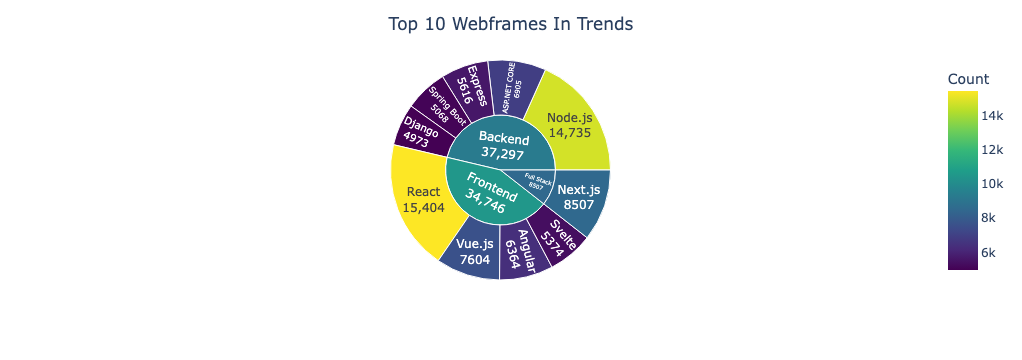

In [165]:
# Simulate your data
top_webframe = pd.Series({
    'React': 15404,
    'Node.js': 14735,
    'Next.js': 8507,
    'Vue.js': 7604,
    'ASP.NET CORE': 6905,
    'Angular': 6364,
    'Express': 5616,
    'Svelte': 5374,
    'Spring Boot': 5068,
    'Django': 4973
}, name='count')

# Convert to DataFrame and add hierarchy categories
df_webframe = top_webframe.reset_index()
df_webframe.columns = ['Framework', 'Count']

# Manually assign category (you can tweak based on real roles)
df_webframe['Category'] = df_webframe['Framework'].map({
    'React': 'Frontend',
    'Vue.js': 'Frontend',
    'Angular': 'Frontend',
    'Svelte': 'Frontend',
    'Next.js': 'Full Stack',
    'Node.js': 'Backend',
    'Express': 'Backend',
    'ASP.NET CORE': 'Backend',
    'Spring Boot': 'Backend',
    'Django': 'Backend'
})

# Create Sunburst chart (Hierarchy Bubble Chart)
fig = px.sunburst(
    df_webframe,
    path=['Category', 'Framework'],  # Hierarchy: Category → Framework
    values='Count',                  # Bubble size
    color='Count',                   # Bubble color intensity
    color_continuous_scale='Viridis'
)

# Enhance layout
fig.update_layout(
    title={
        'text': 'Top 10 Webframes In Trends',
        'x': 0.5,
        'xanchor': 'center'
    }
)

fig.update_traces(textinfo='label+value')

fig.show()

In [181]:
df['Age'].unique()

array(['Under 18 years old', '35-44 years old', '45-54 years old',
       '18-24 years old', '25-34 years old', '55-64 years old',
       'Prefer not to say', '65 years or older'], dtype=object)

In [183]:
df['Age'].isnull().sum()

0

In [185]:
# Count occurrences of each age group
age_counts = df['Age'].value_counts()

def format_autopct(pct, all_vals):
    absolute = int(round(pct/100.0 * sum(all_vals)))
    return f"{pct:.1f}%\n({absolute})"

Text(0.5, 1.0, 'Respondent Distribution by Age')

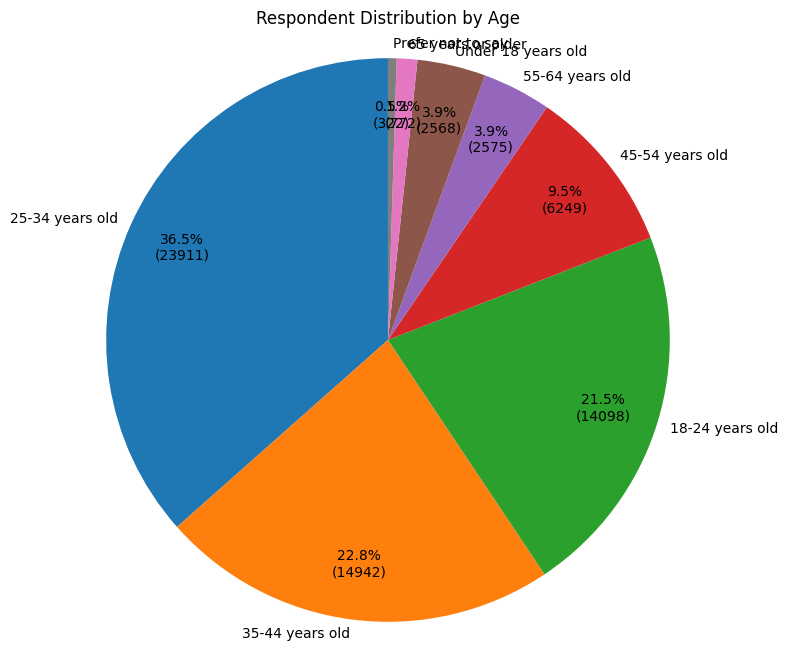

In [209]:
# Create the pie chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    age_counts,
    labels=age_counts.index,
    autopct=lambda pct: format_autopct(pct, age_counts),
    startangle=90,
    textprops={'fontsize': 10},
    labeldistance=1.05,  # Position labels further from the center
    pctdistance=0.8     # Position percentage labels closer to the center
)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Add a title
plt.title('Respondent Distribution by Age')

In [211]:
df['Country'].unique()

array(['United States of America',
       'United Kingdom of Great Britain and Northern Ireland', 'Canada',
       'Norway', 'Uzbekistan', 'Serbia', 'Poland', 'Philippines',
       'Bulgaria', 'Switzerland', 'India', 'Germany', 'Ireland', 'Italy',
       'Ukraine', 'Australia', 'Brazil', 'Japan', 'Austria',
       'Iran, Islamic Republic of...', 'France', 'Saudi Arabia',
       'Romania', 'Turkey', 'Nepal', 'Algeria', 'Sweden', 'Netherlands',
       'Croatia', 'Pakistan', 'Czech Republic',
       'Republic of North Macedonia', 'Finland', 'Slovakia',
       'Russian Federation', 'Greece', 'Israel', 'Belgium', 'Mexico',
       'United Republic of Tanzania', 'Hungary', 'Argentina', 'Portugal',
       'Sri Lanka', 'Latvia', 'China', 'Singapore', 'Lebanon', 'Spain',
       'South Africa', 'Lithuania', 'Viet Nam', 'Dominican Republic',
       'Indonesia', 'Kosovo', 'Morocco', 'Taiwan', 'Georgia',
       'San Marino', 'Tunisia', 'Bangladesh', 'Nigeria', 'Liechtenstein',
       'Denmark', 'Ecu

In [213]:
df['Country'].isnull().sum()

6507

In [215]:
# Define a mapping dictionary for Country column
country_mapping = {
    "United States of America": 'USA',
    'United Kingdom of Great Britain and Northern Ireland': 'UK',
    'Iran, Islamic Republic of...': 'Iran',
    'Venezuela, Bolivarian Republic of...': 'Venezuela',
    "Lao People's Democratic Republic": 'Laos',
    "Democratic People's Republic of Korea": 'South Korea',
    'Congo, Republic of the...': 'Congo',
    'Micronesia, Federated States of...': 'Micronesia',
    'NaN': pd.NA
}

# Apply the mapping
df['Country'] = df['Country'].replace(country_mapping)

In [217]:
df['Country'].unique()

array(['USA', 'UK', 'Canada', 'Norway', 'Uzbekistan', 'Serbia', 'Poland',
       'Philippines', 'Bulgaria', 'Switzerland', 'India', 'Germany',
       'Ireland', 'Italy', 'Ukraine', 'Australia', 'Brazil', 'Japan',
       'Austria', 'Iran', 'France', 'Saudi Arabia', 'Romania', 'Turkey',
       'Nepal', 'Algeria', 'Sweden', 'Netherlands', 'Croatia', 'Pakistan',
       'Czech Republic', 'Republic of North Macedonia', 'Finland',
       'Slovakia', 'Russian Federation', 'Greece', 'Israel', 'Belgium',
       'Mexico', 'United Republic of Tanzania', 'Hungary', 'Argentina',
       'Portugal', 'Sri Lanka', 'Latvia', 'China', 'Singapore', 'Lebanon',
       'Spain', 'South Africa', 'Lithuania', 'Viet Nam',
       'Dominican Republic', 'Indonesia', 'Kosovo', 'Morocco', 'Taiwan',
       'Georgia', 'San Marino', 'Tunisia', 'Bangladesh', 'Nigeria',
       'Liechtenstein', 'Denmark', 'Ecuador', 'Malaysia', 'Albania',
       'Azerbaijan', 'Chile', 'Ghana', 'Peru', 'Bolivia', 'Egypt',
       'Luxembourg'

In [279]:
# Count occurrences of each age group
top_country = df['Country'].value_counts().head(10)

In [281]:
top_country.head(10)

Country
USA            11095
Germany         4947
India           4231
UK              3224
Ukraine         2672
France          2110
Canada          2104
Poland          1534
Netherlands     1449
Brazil          1375
Name: count, dtype: int64

In [219]:
pip install geopandas matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 25.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 21.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [223]:
pip install geodatasets

Note: you may need to restart the kernel to use updated packages.


In [237]:
import geopandas as gpd
from geodatasets import get_path

# Read the dataset into a GeoDataFrame
world = gpd.read_file('ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

In [243]:
print(world.columns)
print(country_counts.columns)

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)
Index(['name', 'respondent_count'], dtype='object')


In [245]:
# Rename 'ADMIN' to 'Country' in world GeoDataFrame
world = world.rename(columns={'ADMIN': 'Country'})

In [251]:
country_counts = country_counts.rename(columns={'name': 'Country'})

In [253]:
# Count respondents per country
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'respondent_count']

In [255]:
# Merge respondent counts with world map data
merged = world.merge(country_counts, on='Country', how='left')

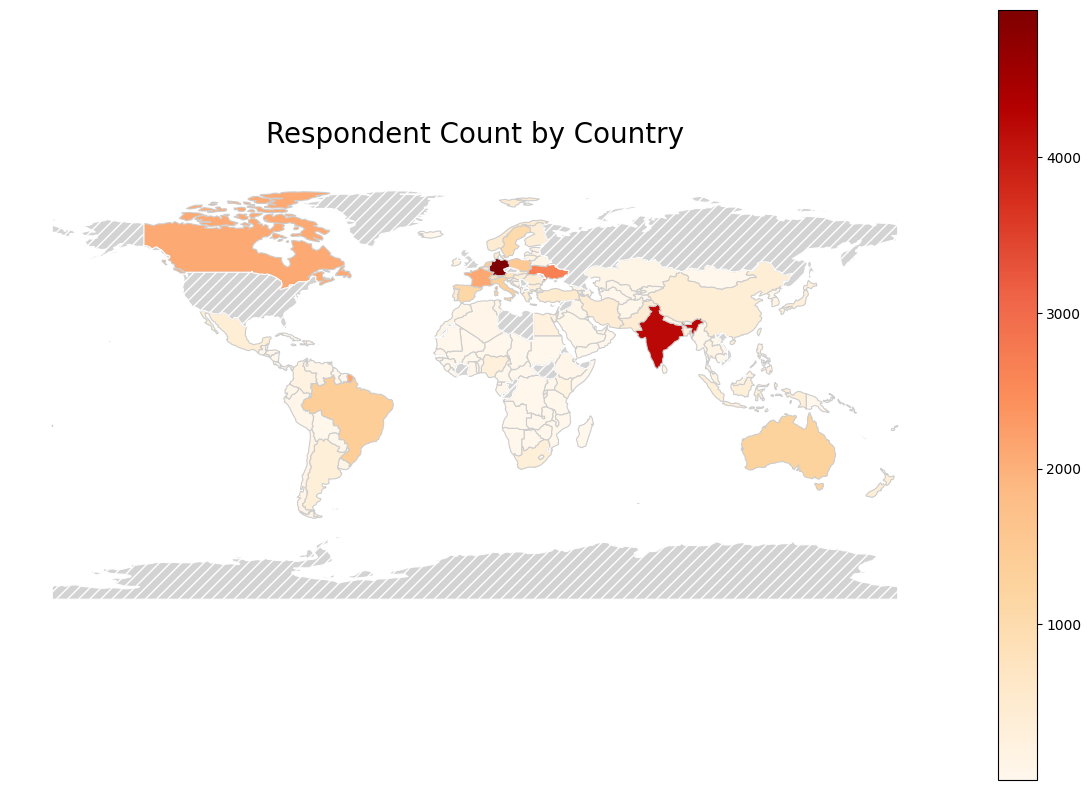

In [257]:
import matplotlib.pyplot as plt

# Set up the plot
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the map
merged.plot(column='respondent_count',
            cmap='OrRd',
            linewidth=0.8,
            ax=ax,
            edgecolor='0.8',
            legend=True,
            missing_kwds={
                "color": "lightgrey",
                "edgecolor": "white",
                "hatch": "///",
                "label": "No data"
            })

# Customize the plot
ax.set_title('Respondent Count by Country', fontdict={'fontsize': 20}, pad=20)
ax.axis('off')

# Show the plot
plt.show()

In [259]:
df['EdLevel'].unique()

array(['Primary/elementary school',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)', 'Something else', nan],
      dtype=object)

In [261]:
df['EdLevel'].isnull().sum()

4653

In [263]:
# Define a mapping dictionary for EdLevel column
EdLevel_mapping = {
    "Bachelor’s degree (B.A., B.S., B.Eng., etc.)": "Bachelor’s degree",
    "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)": "Master’s degree",
    "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)": "Secondary school",
    "Professional degree (JD, MD, Ph.D, Ed.D, etc.)": "Professional degree",
    "Associate degree (A.A., A.S., etc.)": 'Associate degree',
    'NaN': pd.NA
}

# Apply the mapping
df['EdLevel'] = df['EdLevel'].replace(EdLevel_mapping)

In [265]:
df['EdLevel'].unique()

array(['Primary/elementary school', 'Bachelor’s degree',
       'Master’s degree',
       'Some college/university study without earning a degree',
       'Secondary school', 'Professional degree', 'Associate degree',
       'Something else', nan], dtype=object)

In [267]:
# Count respondents per education level (excluding NaNs)
edu_counts = df['EdLevel'].value_counts().sort_values(ascending=False)

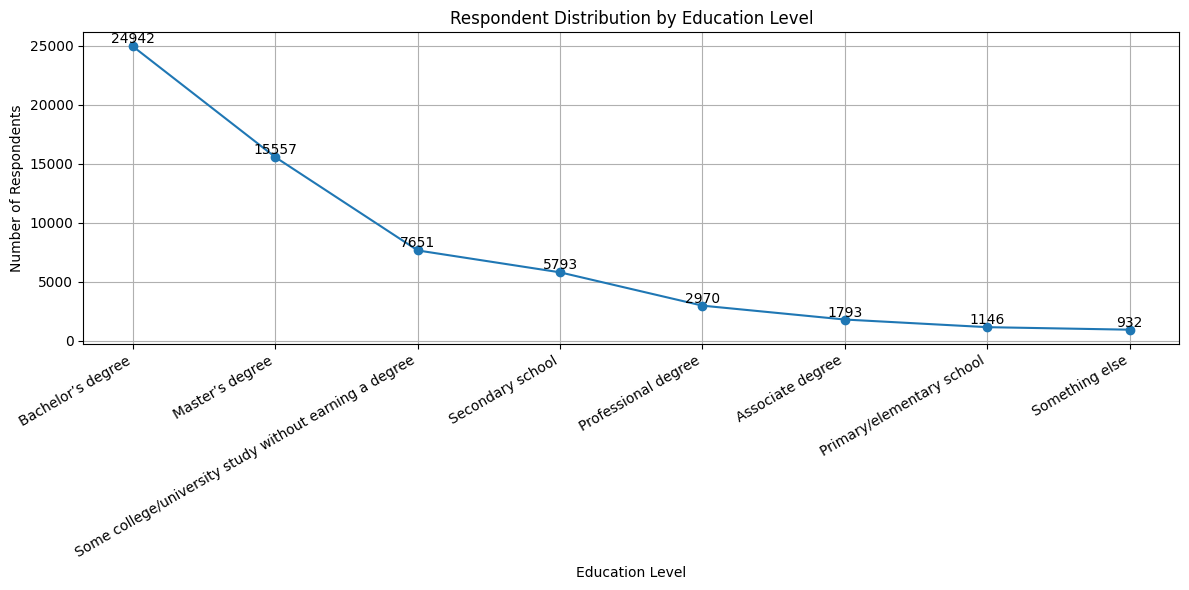

In [269]:
# Plot line chart
plt.figure(figsize=(12, 6))
plt.plot(edu_counts.index, edu_counts.values, marker='o', linestyle='-', color='tab:blue')

# Show value labels above markers
for i, value in enumerate(edu_counts.values):
    plt.text(i, value + 0.2, str(value), ha='center', va='bottom')

# Axis labels and title
plt.xticks(rotation=30, ha='right')
plt.xlabel('Education Level')
plt.ylabel('Number of Respondents')
plt.title('Respondent Distribution by Education Level')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

In [271]:
# Create a pivot table: index = Age, columns = EdLevel, values = count
pivot = df.pivot_table(index='Age', columns='EdLevel', aggfunc='size', fill_value=0)

In [273]:
# Sort Age categories for better readability (custom order)
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]
pivot = pivot.reindex(age_order)

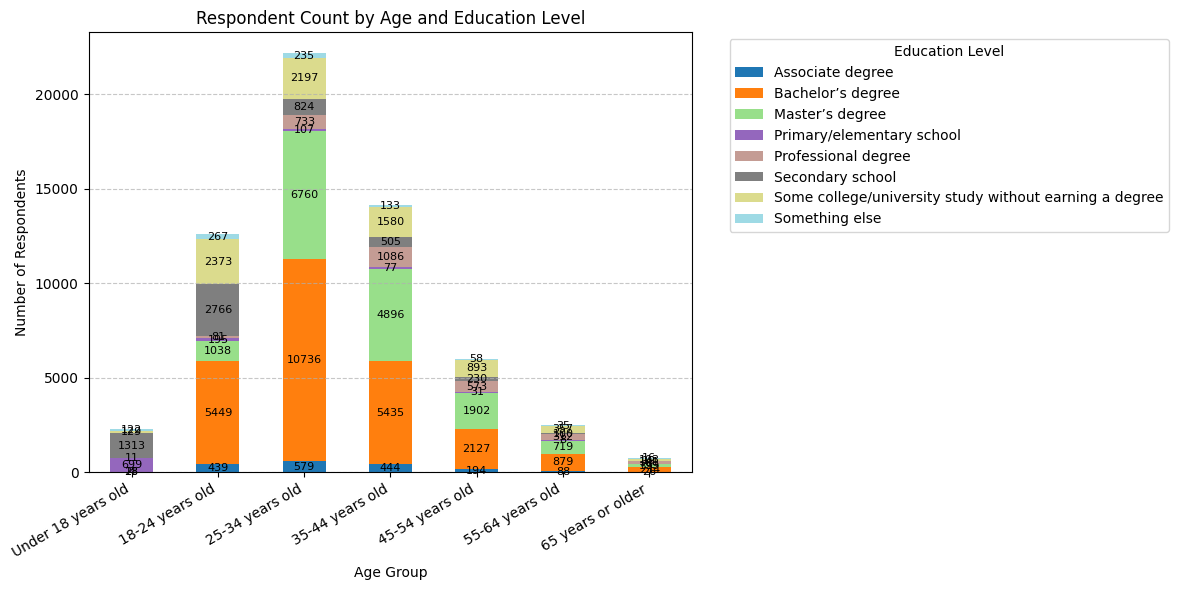

In [275]:
# Plot stacked bar chart
ax = pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

# Add value labels
for bar in ax.containers:
    ax.bar_label(bar, label_type='center', fontsize=8)

# Labels and formatting
plt.title('Respondent Count by Age and Education Level')
plt.xlabel('Age Group')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=30, ha='right')
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()